<a href="https://colab.research.google.com/github/nashita29062003/nashita/blob/main/Overfitting_and_Underfitting_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

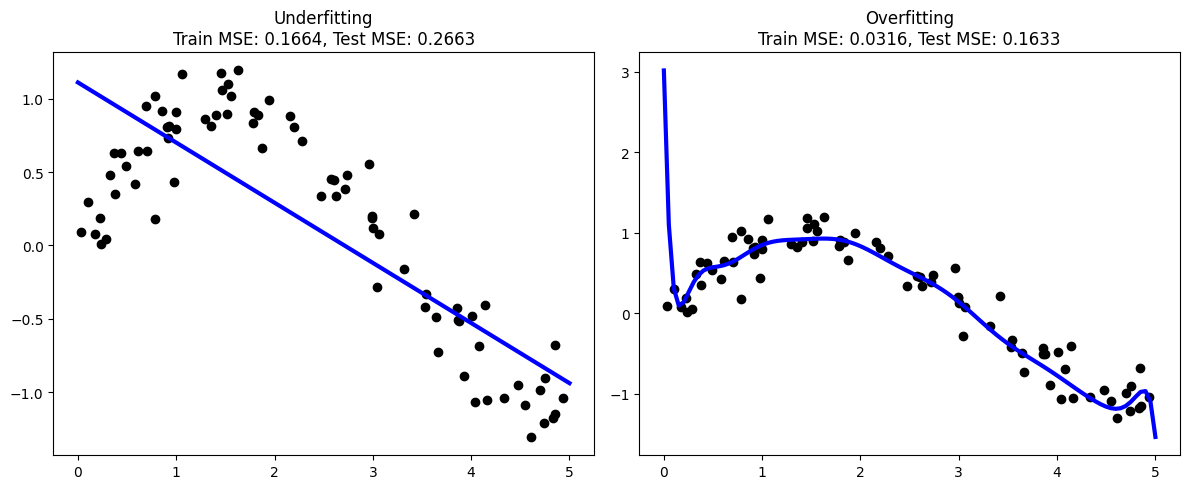

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)

# Generate synthetic data
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot results
def plot_results(ax, X, y, model, title, poly_features=None):
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    if poly_features:
        X_plot = poly_features.transform(X_plot)
    ax.scatter(X, y, color='black')
    ax.plot(X_plot[:, 1], model.predict(X_plot), color='blue', linewidth=3)
    ax.set_title(f"{title}\nTrain MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust layout for 2 subplots
for ax, degree, title in zip(axes, [1, 15], ["Underfitting", "Overfitting"]):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    model = LinearRegression().fit(X_train_poly, y_train)
    train_mse = mean_squared_error(y_train, model.predict(X_train_poly))
    test_mse = mean_squared_error(y_test, model.predict(X_test_poly))
    plot_results(ax, X, y, model, title, poly_features)

plt.tight_layout()
plt.show()